c:\Users\drala\Anaconda3\envs\ox\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
c:\Users\drala\Anaconda3\envs\ox\Lib\site-packages\osmnx\graph.py:112: FutureWarning: The clean_periphery argument has been deprecated and will be removed in the v2.0.0 release. Future behavior will be as though clean_periphery=True. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = graph_from_polygon(


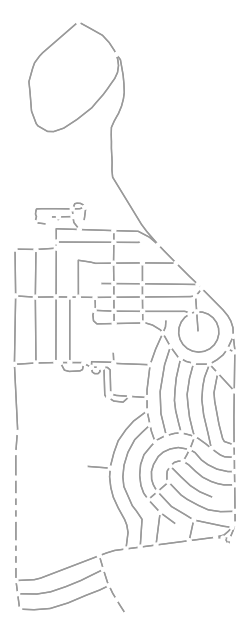

In [3]:
import networkx as nx
import osmnx
import matplotlib.pyplot as plt
from optalgotools.algorithms.graph_search import Kruskal

reference = (26.3071, 50.1459) # KFUPM
G = osmnx.graph_from_point(
    reference, dist=1000, clean_periphery=True, simplify=True, network_type="drive"
)
fig, ax = osmnx.plot_graph(G, bgcolor='white')

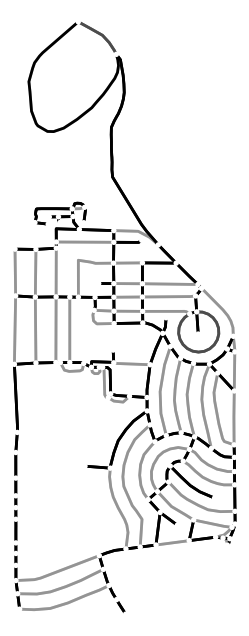

In [4]:
undir_G = G.to_undirected()
sorted_edges = sorted(undir_G.edges(data=True), key=lambda t: t[2].get("length", 1))

mst = Kruskal(undir_G, sorted_edges=True, edges=sorted_edges, graph_type=nx.MultiGraph)

highlight_edges = ["black" if e in mst.edges else "gray" for e in G.edges]
edge_alphas = [1 if e in mst.edges else 0.6 for e in G.edges]

osmnx.plot_graph(
    G, edge_linewidth=2, edge_color=highlight_edges, edge_alpha=edge_alphas,  bgcolor='white'
)
plt.show()